In [33]:
from pathlib import Path
import xarray
#import datatree 
import cartopy.crs as ccrs
import cartopy  
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
datadir = Path.home() / "Downloads" # Path.home() makes the code work for different users  

Read vpn03 files

In [34]:
#def read_vnp03(filename):     

filename03 = "VNP03MOD.A2020166.1342.002.2021125191832.nc"
# Open the file & make it a dataset
vnp03 = xarray.open_dataset(datadir / filename03, group = "geolocation_data",) 
list(vnp03) 

# Access the relavant variables 
height_ds = vnp03['height']  
lwm_ds = vnp03['land_water_mask']   
lat_ds = vnp03['latitude']   
lon_ds = vnp03['longitude']  
senazi_ds = vnp03['sensor_azimuth']  
senzen_ds = vnp03['sensor_zenith']   
solazi_ds = vnp03['solar_azimuth']   
solzen_ds = vnp03['solar_zenith']   

''' Scaling factors not needed automatically implented 
# Apply scaling factors/offsets 
height_scaled = height_ds * 1
lwm_scaled = lwm_ds
lat_scaled = lat_ds
lon_scaled = lon_ds
senazi_scaled = senazi_ds * 0.01
senzen_scaled = senzen_ds * 0.01
solazi_scaled = solazi_ds * 0.01
solzen_scaled = solzen_ds * 0.01 
'''

# Extra: Read the long_names
height_long = height_ds.attrs['long_name']
lwm_long = lwm_ds.attrs['long_name']
lat_long = lat_ds.attrs['long_name']
lon_long = lon_ds.attrs['long_name'] 
senazi_long = senazi_ds.attrs['long_name']
senzen_long = senzen_ds.attrs['long_name']
solazi_long = solazi_ds.attrs['long_name']
solzen_long = solzen_ds.attrs['long_name']   

# Divide the reflectances by the cosine of the solar zenith 
cos_solzen_deg = np.cos(solzen_ds) # degrees
cos_solzen = np.radians(cos_solzen_deg) # radians   
print(cos_solzen) # the 'units' does not change from 'degrees' but the values are changing



<xarray.DataArray 'solar_zenith' (number_of_lines: 3232, number_of_pixels: 3200)>
array([[-1.2151014e-02, -1.2025094e-02, -1.1898018e-02, ...,
        -1.1591095e-03, -9.8493602e-04, -9.8493602e-04],
       [-1.2025094e-02, -1.1898018e-02, -1.1769706e-02, ...,
        -8.1063085e-04, -8.1063085e-04, -8.1063085e-04],
       [-1.1898018e-02, -1.1769706e-02, -1.1640265e-02, ...,
        -6.3624466e-04, -4.6179490e-04, -4.6179490e-04],
       ...,
       [ 4.3399635e-04,  8.4966923e-05, -8.9535984e-05, ...,
         1.7418463e-02,  1.7418463e-02,  1.7418463e-02],
       [ 2.5949461e-04,  8.4966923e-05, -8.9535984e-05, ...,
         1.7406574e-02,  1.7406574e-02,  1.7392941e-02],
       [ 2.5949461e-04,  8.4966923e-05, -2.6406322e-04, ...,
         1.7392941e-02,  1.7377568e-02,  1.7377568e-02]], dtype=float32)
Dimensions without coordinates: number_of_lines, number_of_pixels
Attributes:
    long_name:  Solar zenith angle at pixel locations
    units:      degrees
    valid_min:  0
    vali

Make the maps for relavant variables of the vnp03 files

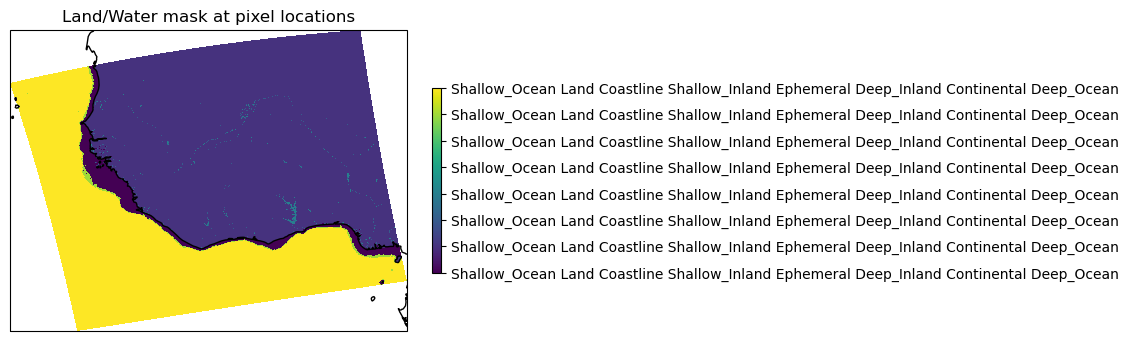

In [35]:
# Land-Water Mask Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, lwm_ds) 
# Pass the longname as the title
ax.set_title(lwm_long)
ax.coastlines() 
# Replace integers with flag_meanings **NOT CURRENTLY WORKING
formatter = plt.FuncFormatter(lambda val, loc: lwm_ds.attrs['flag_meanings'])
# Colorbar and lables  
cb = plt.colorbar(pc, ticks=[0,1,2,3,4,5,6,7], shrink=0.5, format=formatter)  
plt.show()


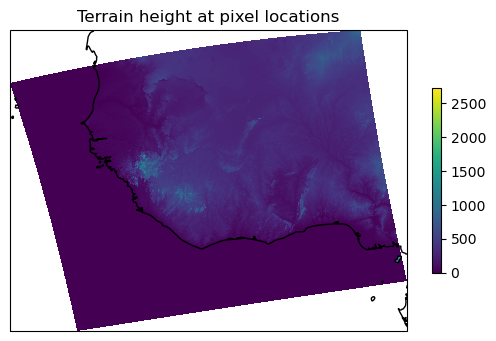

In [36]:
# Height Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, height_ds) 
# Pass the longname as the title
ax.set_title(height_long)
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5)
plt.show()

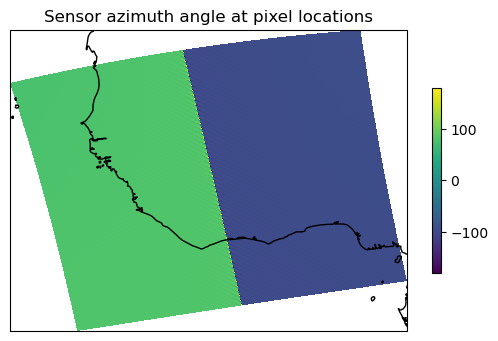

In [37]:
# Sensor_Azimuth Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, senazi_ds) 
# Pass the longname as the title
ax.set_title(senazi_long)
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5)
plt.show()

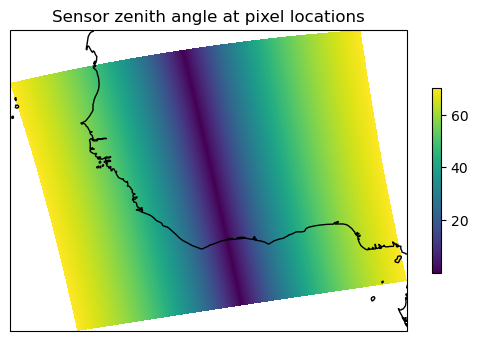

In [38]:
# Sensor_Zenith Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, senzen_ds) 
# Pass the longname as the title
ax.set_title(senzen_long)
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5)
plt.show()

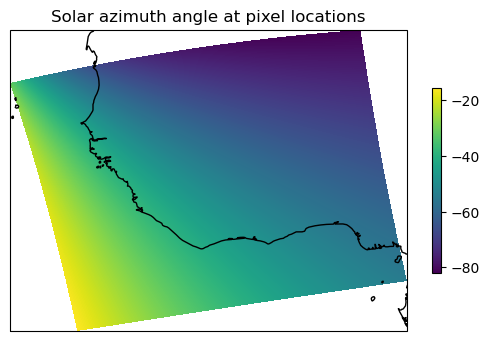

In [39]:
# Solar_Azimuth Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, solazi_ds) 
# Pass the longname as the title
ax.set_title(solazi_long)
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5)
plt.show()

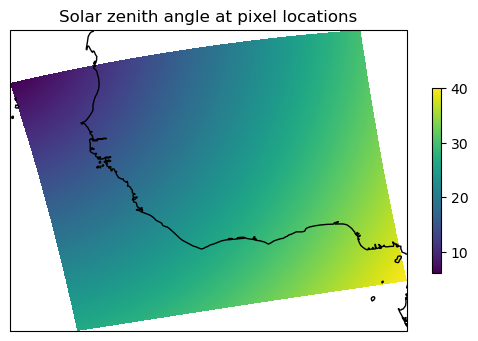

In [40]:
# Solar Zenith Map
ax = plt.axes(projection = ccrs.PlateCarree())
pc = ax.pcolormesh(lon_ds, lat_ds, solzen_ds) 
# Pass the longname as the title
ax.set_title(solzen_long)
ax.coastlines() 
# Colorbar and lables  
cb = plt.colorbar(pc, shrink=0.5)
plt.show()

Read vnp02 files

In [ ]:
#def read_vnp02(): 
filename = "VNP02MOD.A2020166.1342.002.2021127082551.nc"
# Open the dataset
open_ds = xarray.open_dataset(datadir / filename, group = "observation_data", mask_and_scale=False) 
list(open_ds) 

# Access the relavant variables 
M03_ds = open_ds['M03']  # blue light
M04_ds = open_ds['M04']  # green light  
M05_ds = open_ds['M05']  # red light
M09_ds = open_ds['M09']  # wavelength that water absorbs light
M14_ds = open_ds['M14']  # thermal infared wave length
M14_BTL_ds = open_ds['M14_brightness_temperature_lut']   
M15_ds = open_ds['M15'] # thermal infared wave length   
M15_BTL_ds = open_ds['M15_brightness_temperature_lut'] 
M16_ds = open_ds['M16'] # thermal infared wave length  
M16_BTL_ds = open_ds['M16_brightness_temperature_lut']  

# Divide the reflectances by the cosine of the solar zenith 
cos_solzen = np.cos(solzen_ds) # degrees
cos_solzen = np.radians(cos_solzen) # radians  

# Divide the reflectances by the cosine of the solar zenith angle 

'''
Currently unable to complete website cannot be reached will try again later 7/5 - 1:00p
https://ladsweb.modaps.eosdis.nasa.gov/api/v2/content/archives/Document%20Archive/Science%20Data%20Product%20Documentation/NASA_VIIRS_L1B_UG_August_2021.pdf 
Pg. 20
'''
# Check for the fill value  
for value in open_ds: 
    if pd.isna(value) == True: 
        value = -999 
    elif value == 65535: # this is from the "_FillValue" variable in the dataset (idk if I need this or the one above)
        value = -999

# Convert to brightness temperature in K (idk if this is correct...) 
BT14_ds = open_ds['M14_brightness_temperature_lut'][open_ds['M14']] 
BT15_ds = open_ds['M15_brightness_temperature_lut'][open_ds['M15']] 
BT16_ds = open_ds['M16_brightness_temperature_lut'][open_ds['M16']]


Map vpn_02

In [ ]:
# M03 Map 

In [ ]:
# M04 Map

In [ ]:
# M05 Map 

In [ ]:
# M09 Map

In [ ]:
# M14 Map